In [1]:
#IMPORTS
import numpy as np
import cv2
import sklearn
import scipy
import imageio
import math
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
def get_phase_correlations(images):
    offsets = []
    for i in range(len(images)-1):
        d = cv2.phaseCorrelate(images[i], images[i+1])
        offsets.append(d)
    return offsets

In [38]:
def combine_images(image1, image2, offset_x, offset_y):
    offset_x = -int(offset_x)
    offset_y = int(offset_y)
    if offset_x < 0:
        merge_width = max(image2.shape[1], image1.shape[1]-offset_x)
        warp_offset_x = 0
        ref_offset_x = offset_x
    else:
        merge_width = max(image2.shape[1] + offset_x, image1.shape[1])
        warp_offset_x = offset_x
        ref_offset_x = 0
    if offset_y < 0:
        merge_height = max(image2.shape[0], image1.shape[0]-offset_y)
        warp_offset_y = 0
        ref_offset_y = offset_y
    else:
        merge_height = max(image2.shape[0] + offset_y, image1.shape[0])
        warp_offset_y = offset_y
        ref_offset_y = 0
    
    combined_image = np.zeros((merge_height,merge_width,3)).astype(np.uint8)
    for y in range(image2.shape[0]):
        for x in range(image2.shape[1]):
            combined_image[y+warp_offset_y,x+warp_offset_x] = image2[y,x]
    
    for y in range(image1.shape[0]):
        for x in range(image1.shape[1]):
            if np.all((combined_image[y-ref_offset_y,x-ref_offset_x] == 0)):
                combined_image[y-ref_offset_y, x-ref_offset_x] = image1[y,x]
    return combined_image
    
    

In [39]:
images = [imageio.imread("test_images/"+str(x+1)+".jpg") for x in range(12)]
grayscale_images = []
for i in range(len(images)):
    grayscale_images.append(rgb2gray(images[i]))
offsets = get_phase_correlations(grayscale_images)


In [46]:
combined_image = images[0]
offset_x = 0
offset_y = 0
for i in range(len(images)-1):
    offset_x += offsets[i][0][0]
    offset_y += offsets[i][0][1] 
    combined_image = combine_images(combined_image, images[i+1], offset_x, offset_y)

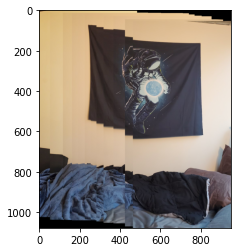

In [47]:
fig,axes = plt.subplots(1,1)
axes.imshow(combined_image)
plt.show()